## MILESTONE - 2

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### 1. Load the Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/InfosysSpringboard-Project-Dataset-Final/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Replace Medically Impossible Zeros With NaN

In [5]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)


### 3. Handle Missing Values (Median Imputation)

In [6]:
df[zero_cols] = df[zero_cols].fillna(df[zero_cols].median())

### 4. Split Features and Target

In [7]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


### 5. Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 6. Feature Scaling

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7. Train Models

#### Model 1 — Logistic Regression

In [10]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

log_pred = log_model.predict(X_test_scaled)

#### Model 2 — Random Forest

In [11]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


### 8. Evaluate Both Models

In [12]:
print("📌 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))


📌 Logistic Regression Results
Accuracy: 0.7077922077922078
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [13]:
print("📌 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


📌 Random Forest Results
Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



### 9. Confusion Matrix (Visualization)

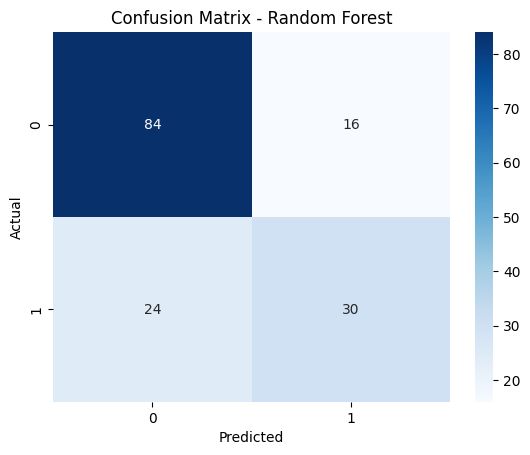

In [14]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### 10. Predict for a New Patient

In [15]:
new_patient = np.array([[3, 150, 80, 25, 100, 30.0, 0.5, 35]])

new_patient_scaled = scaler.transform(new_patient)

prediction = rf_model.predict(new_patient)

print("Prediction:", "Diabetic" if prediction[0]==1 else "Not Diabetic")

Prediction: Not Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
